# Gradient Descent for Linear Regression

Automating the process of optimizing $m$ and $b$ using gradient descent.

$$ \min_{m, b} J(m, b) $$

| Symbol | |
| --- | --- |
| m | The weight (or slope) of the linear regression model. |
| b | The y intercept of the linear regression model. |
| J(m, b) | The cost function, typically the Mean Squared Error (MSE) |

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from utils_grad_dec import plt_contour_mgrad, plt_divergence, plt_gradients, compute_model_output

In [2]:
# Load a simple data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

#### Implement Gradient Descent

In [3]:
def compute_cost(x, y, m, b): 
    # number of training examples
    n = x.shape[0] 
    cost_sum = 0 
    for i in range(n): 
        f_mb = m * x[i] + b   
        cost = (f_mb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * n)) * cost_sum  
    return total_cost

In [4]:
def compute_gradient(x, y, m, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      m,b (scalar)    : model parameters  
    Returns
      dj_dm (scalar): The gradient of the cost m.r.t. the parameters m
      dj_db (scalar): The gradient of the cost m.r.t. the parameter b     
     """
    # Number of training examples
    n = x.shape[0]    
    dj_dm = 0
    dj_db = 0
    
    for i in range(n):  
        f_mb = m * x[i] + b 
        dj_dm_i = (f_mb - y[i]) * x[i] 
        dj_db_i = f_mb - y[i] 
        dj_db += dj_db_i
        dj_dm += dj_dm_i 
    dj_dm = dj_dm / n 
    dj_db = dj_db / n 
        
    return dj_dm, dj_db

#### Visualise Gradient Decent

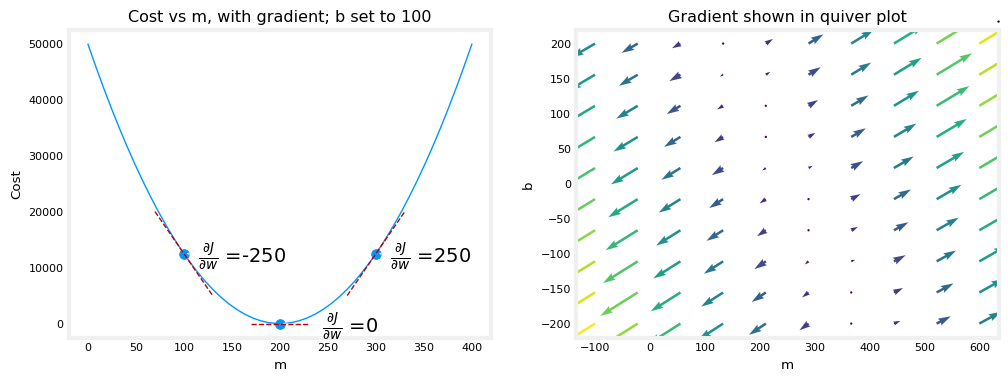

In [5]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

####  Gradient Descent

In [6]:
def gradient_descent(x, y, m_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit m,b. Updates m,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      m_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      m (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [m,b] 
      """
    
    # An array to store cost J and m's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    m = m_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dm, dj_db = gradient_function(x, y, m , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        m = m - alpha * dj_dm                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, m , b))
            p_history.append([m,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dm: {dj_dm: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"m: {m: 0.3e}, b:{b: 0.5e}")
 
    return m, b, J_history, p_history #return mb and J,m history for graphing

In [7]:
# initialize parameters
m_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
m_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, m_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(m,b) found by gradient descent: ({m_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dm: -6.500e+02, dj_db: -4.000e+02   m:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dm: -3.712e-01, dj_db:  6.007e-01   m:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dm: -1.789e-01, dj_db:  2.895e-01   m:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dm: -8.625e-02, dj_db:  1.396e-01   m:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dm: -4.158e-02, dj_db:  6.727e-02   m:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dm: -2.004e-02, dj_db:  3.243e-02   m:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dm: -9.660e-03, dj_db:  1.563e-02   m:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dm: -4.657e-03, dj_db:  7.535e-03   m:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dm: -2.245e-03, dj_db:  3.632e-03   m:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dm: -1.082e-03, dj_db:  1.751e-03   m:  2.000e+02, b: 1.00024e+02


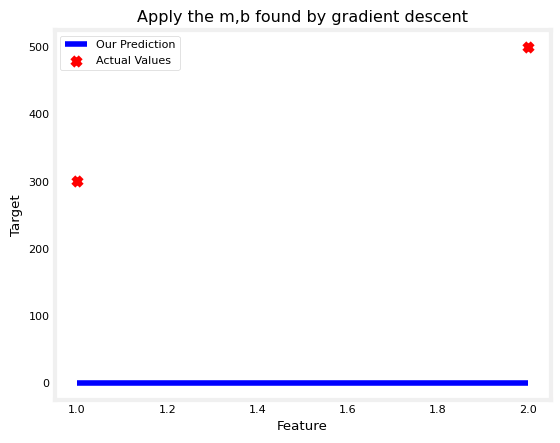

In [8]:
m = 0
b = 0

tmp_f_mb = compute_model_output(x_train, m, b,)

# Plot
plt.plot(x_train, tmp_f_mb, c='b',label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title('Apply the m,b found by gradient descent')
plt.ylabel('Target')
plt.xlabel('Feature')
plt.legend()
plt.show()

In [9]:
#Make predictions with m,b found by gradient descent
print(f"Feature = 1 prediction {m_final*1.0 + b_final:0.1f}")
print(f"Feature = 1.2 prediction {m_final*1.2 + b_final:0.1f}")
print(f"Feature = 2 prediction {m_final*2.0 + b_final:0.1f}")

Feature = 1 prediction 300.0
Feature = 1.2 prediction 340.0
Feature = 2 prediction 500.0


#### Optimal Progress of gradient descent

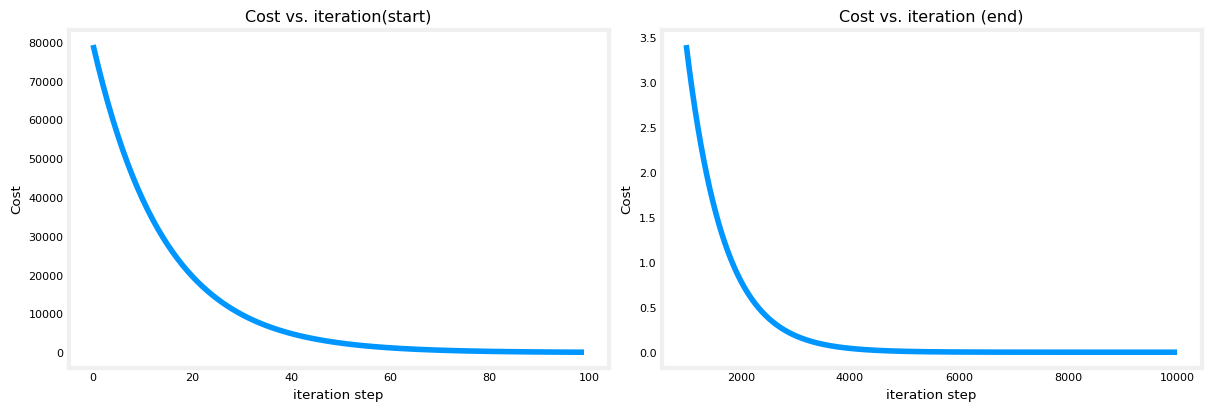

In [10]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

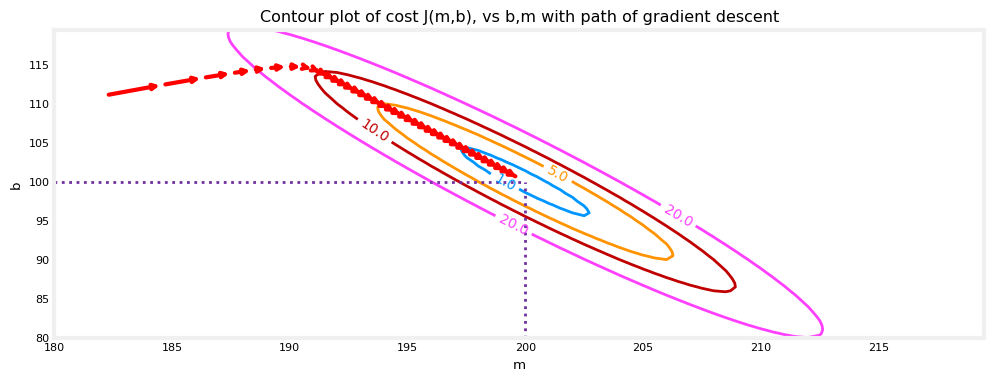

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_mgrad(x_train, y_train, p_hist, ax, m_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

#### Too High Learning Rate

In [12]:
m_init = 0
b_init = 0
iterations = 10
tmp_alpha = 8.0e-1
m_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, m_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 2.58e+05  dj_dm: -6.500e+02, dj_db: -4.000e+02   m:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dm:  1.130e+03, dj_db:  7.000e+02   m: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dm: -1.970e+03, dj_db: -1.216e+03   m:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dm:  3.429e+03, dj_db:  2.121e+03   m: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dm: -5.974e+03, dj_db: -3.691e+03   m:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dm:  1.040e+04, dj_db:  6.431e+03   m: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dm: -1.812e+04, dj_db: -1.120e+04   m:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dm:  3.156e+04, dj_db:  1.950e+04   m: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dm: -5.496e+04, dj_db: -3.397e+04   m:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dm:  9.572e+04, dj_db:  5.916e+04   m: -4.845e+04, b:-2.99567e+04


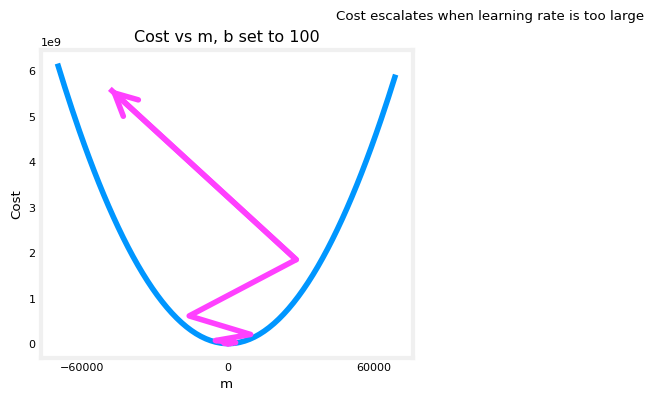

In [13]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

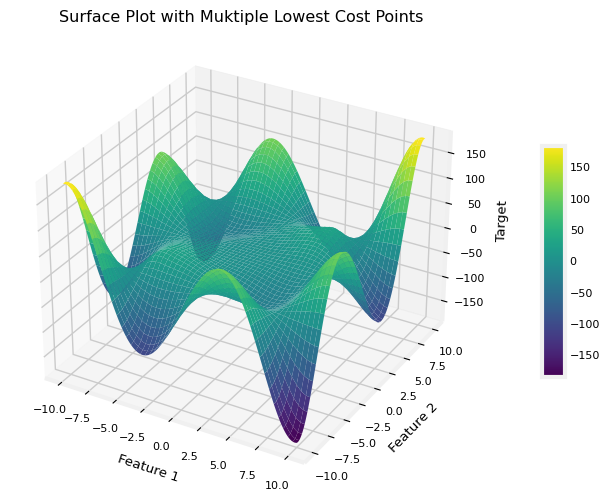

In [14]:
# Gradient Descent with Non MSE Cost Function with multiple minima
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x, y)
Z = (X**2 + Y**2) * np.sin(X / 2) * np.sin(Y / 2) + 10 * np.exp(-((X - 5)**2 + (Y - 5)**2)) \
    + 8 * np.exp(-((X + 5)**2 + (Y + 5)**2))
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title("Surface Plot with Muktiple Lowest Cost Points")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Target")
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

In [15]:
# Normalize x_train and y_train to optimise gradient descent
x_min, x_max = x_train.min(), x_train.max()
y_min, y_max = y_train.min(), y_train.max()

x_train_norm = (x_train - x_min) / (x_max - x_min)
y_train_norm = (y_train - y_min) / (y_max - y_min)

print("Normalized x_train:", x_train_norm)
print("Normalized y_train:", y_train_norm)

Normalized x_train: [0. 1.]
Normalized y_train: [0. 1.]


Iteration    0: Cost 2.45e-01  dj_dm: -5.000e-01, dj_db: -5.000e-01   m:  5.000e-03, b: 5.00000e-03
Iteration 1000: Cost 1.50e-03  dj_dm: -2.043e-02, dj_db:  1.263e-02   m:  8.932e-01, b: 6.59869e-02
Iteration 2000: Cost 3.29e-05  dj_dm: -3.020e-03, dj_db:  1.867e-03   m:  9.842e-01, b: 9.75532e-03
Iteration 3000: Cost 7.19e-07  dj_dm: -4.465e-04, dj_db:  2.760e-04   m:  9.977e-01, b: 1.44218e-03
Iteration 4000: Cost 1.57e-08  dj_dm: -6.601e-05, dj_db:  4.080e-05   m:  9.997e-01, b: 2.13205e-04
Iteration 5000: Cost 3.43e-10  dj_dm: -9.759e-06, dj_db:  6.031e-06   m:  9.999e-01, b: 3.15193e-05
Iteration 6000: Cost 7.50e-12  dj_dm: -1.443e-06, dj_db:  8.916e-07   m:  1.000e+00, b: 4.65966e-06
Iteration 7000: Cost 1.64e-13  dj_dm: -2.133e-07, dj_db:  1.318e-07   m:  1.000e+00, b: 6.88863e-07
Iteration 8000: Cost 3.58e-15  dj_dm: -3.153e-08, dj_db:  1.949e-08   m:  1.000e+00, b: 1.01838e-07
Iteration 9000: Cost 7.83e-17  dj_dm: -4.661e-09, dj_db:  2.881e-09   m:  1.000e+00, b: 1.50553e-08


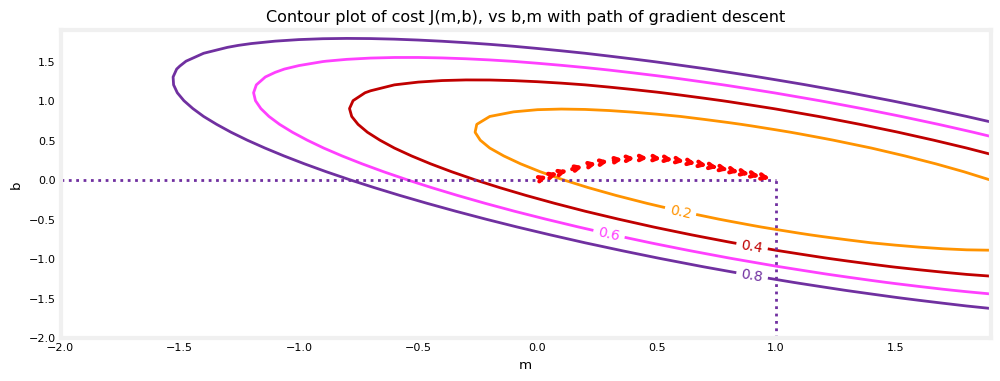

In [16]:
# initialize parameters
m_init_norm = 0
b_init_norm = 0
# some gradient descent settings
iterations_norm = 10000
tmp_alpha_norm = 1.0e-2

m_final, b_final, J_hist, p_hist = gradient_descent(x_train_norm ,y_train_norm, m_init_norm, b_init_norm, tmp_alpha_norm, 
                                                    iterations_norm, compute_cost, compute_gradient)
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_mgrad(x_train_norm, y_train_norm, p_hist, ax, m_range=[-2, 2, 0.1], b_range=[-2, 2, 0.1],
            contours=[0,0.2,0.4,0.6,0.8],resolution=0.05, w_final=1, b_final=0)
print(f"(m,b) found by gradient descent: ({m_final:8.4f},{b_final:8.4f})")